In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


df = pd.read_csv('/content/drive/My Drive/Project sem1/Datasets/Change_in_Mean_Sea_Levels.csv')

# Now you can work with the dataframe 'df'
print(df.head())

   ObjectId Country  ISO2 ISO3  \
0         1   World   NaN  WLD   
1         2   World   NaN  WLD   
2         3   World   NaN  WLD   
3         4   World   NaN  WLD   
4         5   World   NaN  WLD   

                                           Indicator         Unit  \
0  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
1  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
2  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
3  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
4  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   

                                              Source CTS_Code  \
0  National Oceanic and Atmospheric Administratio...     ECCL   
1  National Oceanic and Atmospheric Administratio...     ECCL   
2  National Oceanic and Atmospheric Administratio...     ECCL   
3  National Oceanic and Atmospheric Administratio...     ECCL   
4  National Oceanic and Atmospheric Administratio...   

In [ ]:
df = df.drop('ISO2', axis=1)

print(df.head())

   ObjectId Country ISO3                                          Indicator  \
0         1   World  WLD  Change in mean sea level: Sea level: TOPEX.Pos...   
1         2   World  WLD  Change in mean sea level: Sea level: TOPEX.Pos...   
2         3   World  WLD  Change in mean sea level: Sea level: TOPEX.Pos...   
3         4   World  WLD  Change in mean sea level: Sea level: TOPEX.Pos...   
4         5   World  WLD  Change in mean sea level: Sea level: TOPEX.Pos...   

          Unit                                             Source CTS_Code  \
0  Millimeters  National Oceanic and Atmospheric Administratio...     ECCL   
1  Millimeters  National Oceanic and Atmospheric Administratio...     ECCL   
2  Millimeters  National Oceanic and Atmospheric Administratio...     ECCL   
3  Millimeters  National Oceanic and Atmospheric Administratio...     ECCL   
4  Millimeters  National Oceanic and Atmospheric Administratio...     ECCL   

                   CTS_Name  \
0  Change in Mean Sea Lev

In [ ]:
df.dtypes

,0
ObjectId,int64
Country,object
ISO3,object
Indicator,object
Unit,object
Source,object
CTS_Code,object
CTS_Name,object
CTS_Full_Descriptor,object
Measure,object


In [ ]:
df['Date'] = pd.to_datetime(df['Date'].str.lstrip('D'), format='%m/%d/%Y', errors='coerce')

# Verify the updated data type
print(df.dtypes)

ObjectId                        int64
Country                        object
ISO3                           object
Indicator                      object
Unit                           object
Source                         object
CTS_Code                       object
CTS_Name                       object
CTS_Full_Descriptor            object
Measure                        object
Date                   datetime64[ns]
Value                         float64
dtype: object


In [ ]:
print(df['Date'])

0       1992-12-17
1       1992-12-17
2       1992-12-17
3       1992-12-17
4       1992-12-17
           ...    
35599   2022-11-08
35600   2022-11-08
35601   2022-11-08
35602   2022-11-08
35603   2022-11-08
Name: Date, Length: 35604, dtype: datetime64[ns]


In [ ]:
unique_measures = df['Measure'].unique()
unique_measures

array(['Andaman Sea', 'Arabian Sea', 'Atlantic Ocean', 'Baltic Sea',
       'Bay Bengal', 'Caribbean Sea', 'Gulf Mexico', 'Indian Ocean',
       'Indonesian', 'Mediterranean', 'Nino', 'North Pacific',
       'North Sea', 'Pacific Ocean', 'Persian Gulf', 'Sea Japan',
       'Sea Okhotsk', 'South China', 'Southern Ocean', 'Tropics', 'World',
       'Yellow Sea', 'Adriatic Sea', 'Bering Sea', 'North Atlantic'],
      dtype=object)

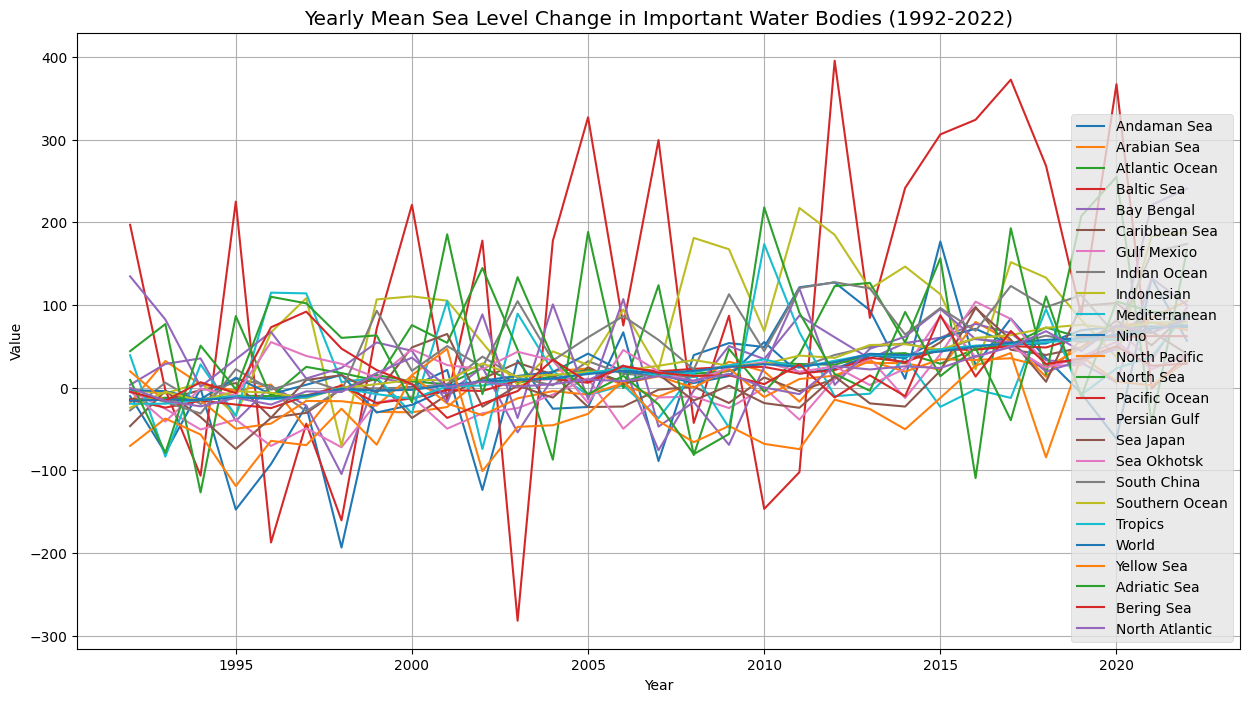

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')

# Create an empty dictionary to store the yearly changes
yearly_changes = {}

# Iterate over unique measures
for measure in unique_measures:
    yearly_changes[measure] = {}
    # Filter data for the current measure
    measure_df = df[df['Measure'] == measure]

    # Iterate through years from 1992 to 2022
    for year in range(1992, 2023):
        # Filter data for the current year
        year_df = measure_df[measure_df['Date'].dt.year == year]

        # Check if data exists for the year. If not, add NaN.
        if not year_df.empty:
           yearly_changes[measure][year] = year_df['Value'].iloc[0]
        else:
            yearly_changes[measure][year] = float('nan')


# Plotting the yearly changes for each unique measure
plt.figure(figsize=(15, 8)) # Adjust the figure size as needed

for measure, values in yearly_changes.items():
    years = list(values.keys())
    changes = list(values.values())
    plt.plot(years, changes, label=measure)
with plt.style.context('ggplot'):
  plt.xlabel('Year')
  plt.ylabel('Value')
  plt.title('Yearly Mean Sea Level Change in Important Water Bodies (1992-2022)')
  plt.legend()
  plt.grid(True)
  plt.show()

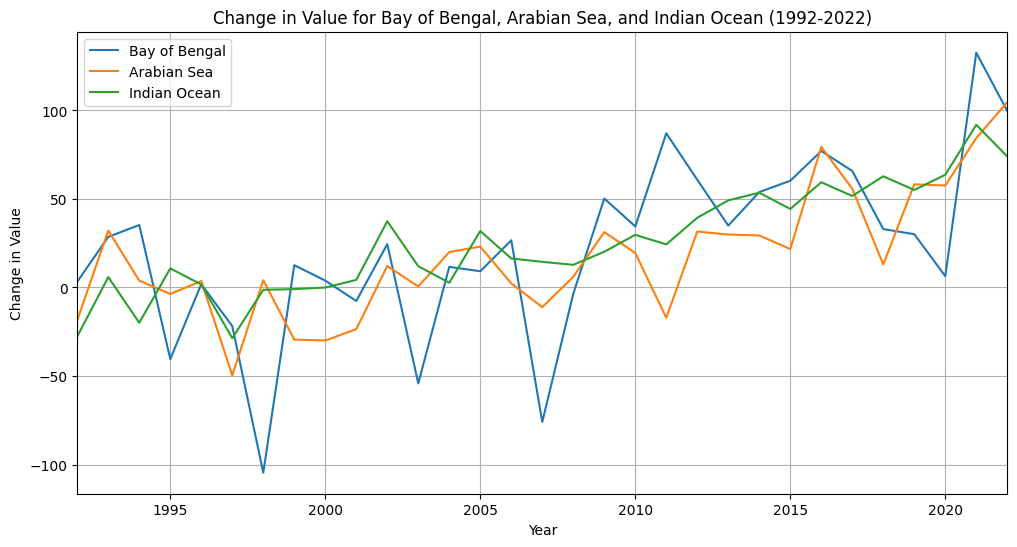

In [ ]:
import matplotlib.pyplot as plt

bay_of_bengal_data = yearly_changes.get('Bay Bengal', {})
arabian_sea_data = yearly_changes.get('Arabian Sea', {})
indian_ocean_data = yearly_changes.get('Indian Ocean', {})

plt.figure(figsize=(12, 6))

plt.plot(list(bay_of_bengal_data.keys()), list(bay_of_bengal_data.values()), label='Bay of Bengal')
plt.plot(list(arabian_sea_data.keys()), list(arabian_sea_data.values()), label='Arabian Sea')
plt.plot(list(indian_ocean_data.keys()), list(indian_ocean_data.values()), label='Indian Ocean')


plt.xlabel('Year')
plt.ylabel('Change in Value')
plt.title('Change in Value for Bay of Bengal, Arabian Sea, and Indian Ocean (1992-2022)')
plt.legend()
plt.grid(True)
plt.xlim(1992, 2022)
plt.show()

In [ ]:
print(arabian_sea_data)

{1992: -18.46, 1993: 32.14, 1994: 3.84, 1995: -3.66, 1996: 3.64, 1997: -49.66, 1998: 4.04, 1999: -29.46, 2000: -29.96, 2001: -23.56, 2002: 12.14, 2003: 0.54, 2004: 19.99, 2005: 23.09, 2006: 2.29, 2007: -11.11, 2008: 5.99, 2009: 31.29, 2010: 19.48, 2011: -17.12, 2012: 31.59, 2013: 29.89, 2014: 29.38, 2015: 21.68, 2016: 79.38, 2017: 55.77, 2018: 12.97, 2019: 58.27, 2020: 57.57, 2021: 84.37, 2022: 104.67}


In [ ]:
print(indian_ocean_data)

{1992: -27.63, 1993: 5.87, 1994: -19.93, 1995: 10.77, 1996: 1.67, 1997: -28.63, 1998: -1.33, 1999: -0.93, 2000: -0.03, 2001: 4.27, 2002: 37.37, 2003: 11.98, 2004: 2.68, 2005: 31.88, 2006: 16.38, 2007: 14.48, 2008: 12.78, 2009: 20.18, 2010: 29.72, 2011: 24.32, 2012: 39.38, 2013: 49.18, 2014: 53.52, 2015: 44.32, 2016: 59.42, 2017: 51.67, 2018: 62.77, 2019: 55.07, 2020: 63.67, 2021: 91.87, 2022: 73.97}


In [ ]:
print(bay_of_bengal_data)

{1992: 3.27, 1993: 28.57, 1994: 35.27, 1995: -40.43, 1996: 1.87, 1997: -21.83, 1998: -104.63, 1999: 12.57, 2000: 3.87, 2001: -7.63, 2002: 24.47, 2003: -54.16, 2004: 11.64, 2005: 9.17, 2006: 26.64, 2007: -75.96, 2008: -3.56, 2009: 50.24, 2010: 34.47, 2011: 87.07, 2012: 60.84, 2013: 34.94, 2014: 53.87, 2015: 60.27, 2016: 77.07, 2017: 65.78, 2018: 32.98, 2019: 30.08, 2020: 6.38, 2021: 132.58, 2022: 99.68}


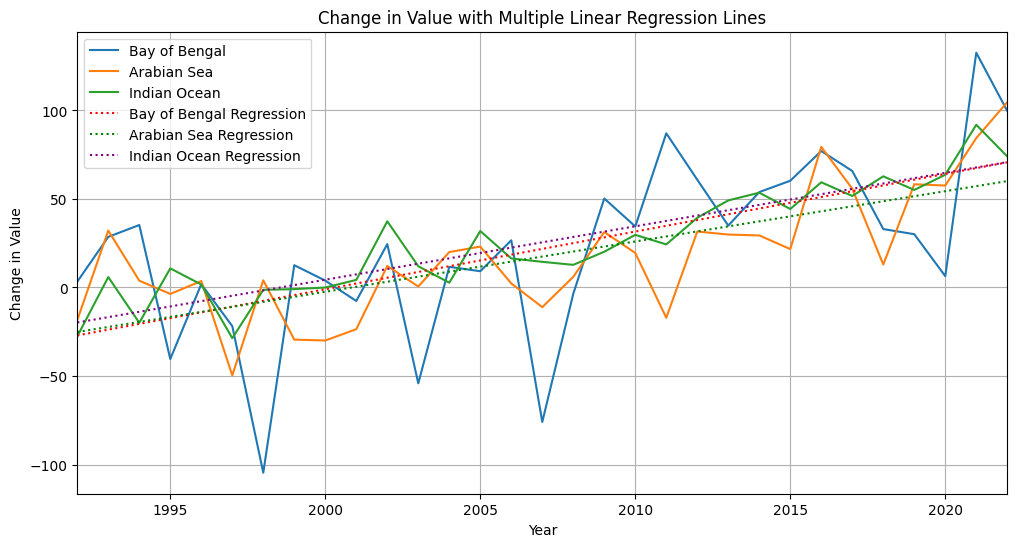

In [ ]:
import statsmodels.api as sm

bay_of_bengal_data = yearly_changes.get('Bay Bengal', {})
arabian_sea_data = yearly_changes.get('Arabian Sea', {})
indian_ocean_data = yearly_changes.get('Indian Ocean', {})

# Function to perform linear regression and return the regression line
def get_regression_line(data):
    years = list(data.keys())
    values = list(data.values())

    # Remove NaN values
    valid_indices = [i for i, val in enumerate(values) if not pd.isna(val)]
    years_valid = [years[i] for i in valid_indices]
    values_valid = [values[i] for i in valid_indices]

    X = sm.add_constant(years_valid) # Add a constant for the intercept
    model = sm.OLS(values_valid, X).fit()
    return model.params[0], model.params[1]


# Get regression lines for each dataset
intercept_bay, slope_bay = get_regression_line(bay_of_bengal_data)
intercept_arabian, slope_arabian = get_regression_line(arabian_sea_data)
intercept_indian, slope_indian = get_regression_line(indian_ocean_data)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each dataset
plt.plot(list(bay_of_bengal_data.keys()), list(bay_of_bengal_data.values()), label='Bay of Bengal')
plt.plot(list(arabian_sea_data.keys()), list(arabian_sea_data.values()), label='Arabian Sea')
plt.plot(list(indian_ocean_data.keys()), list(indian_ocean_data.values()), label='Indian Ocean')


# Plot regression lines
years = range(1992, 2023)
plt.plot(years, [intercept_bay + slope_bay * year for year in years], color='red', label='Bay of Bengal Regression',linestyle='dotted')
plt.plot(years, [intercept_arabian + slope_arabian * year for year in years], color='green', label='Arabian Sea Regression',linestyle='dotted')
plt.plot(years, [intercept_indian + slope_indian * year for year in years], color='purple', label='Indian Ocean Regression',linestyle='dotted')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Change in Value')
plt.title('Change in Value with Multiple Linear Regression Lines')
plt.legend()
plt.grid(True)
plt.xlim(1992, 2022)  # Set x-axis limits
plt.show()

In [ ]:
import numpy as np

def regression_summary(data, name):
    years = list(data.keys())
    values = list(data.values())

    # Remove NaN values
    valid_indices = [i for i, val in enumerate(values) if not pd.isna(val)]
    years_valid = np.array([years[i] for i in valid_indices])
    values_valid = np.array([values[i] for i in valid_indices])

    X = sm.add_constant(years_valid)
    model = sm.OLS(values_valid, X).fit()
    print(f"Summary for {name}:")
    print(model.summary())

    predictions = model.predict(X)
    mse = np.mean((values_valid - predictions)**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(values_valid - predictions))
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print("-" * 20)

regression_summary(bay_of_bengal_data, "Bay of Bengal")
regression_summary(arabian_sea_data, "Arabian Sea")
regression_summary(indian_ocean_data, "Indian Ocean")

Summary for Bay of Bengal:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     16.20
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           0.000374
Time:                        03:34:08   Log-Likelihood:                -157.55
No. Observations:                  31   AIC:                             319.1
Df Residuals:                      29   BIC:                             322.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6517.6909   1

Predictions for future years:
Year: 2023
  Bay of Bengal: 73.92012903225714
  Arabian Sea: 62.905096774193225
  Indian Ocean: 73.81703225806359
Year: 2024
  Bay of Bengal: 77.17846370967618
  Arabian Sea: 65.74589919354821
  Indian Ocean: 76.83642338709615
Year: 2030
  Bay of Bengal: 96.72847177419226
  Arabian Sea: 82.79071370967722
  Indian Ocean: 94.95277016128966
Year: 2040
  Bay of Bengal: 129.31181854838542
  Arabian Sea: 111.19873790322526
  Indian Ocean: 125.14668145161158
Year: 2050
  Bay of Bengal: 161.89516532257858
  Arabian Sea: 139.6067620967733
  Indian Ocean: 155.3405927419335


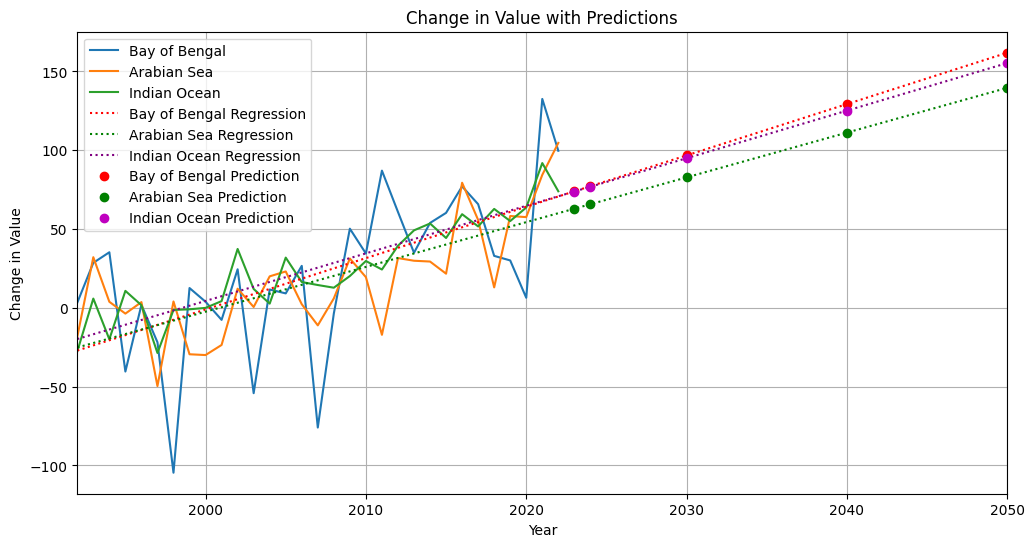

In [ ]:
# Predict values for future years
future_years = [2023, 2024, 2030, 2040, 2050]

predicted_bay_of_bengal = [intercept_bay + slope_bay * year for year in future_years]
predicted_arabian_sea = [intercept_arabian + slope_arabian * year for year in future_years]
predicted_indian_ocean = [intercept_indian + slope_indian * year for year in future_years]

# Print the predictions
print("Predictions for future years:")
for i in range(len(future_years)):
    print(f"Year: {future_years[i]}")
    print(f"  Bay of Bengal: {predicted_bay_of_bengal[i]}")
    print(f"  Arabian Sea: {predicted_arabian_sea[i]}")
    print(f"  Indian Ocean: {predicted_indian_ocean[i]}")

# Plot the predictions along with the existing data and regression lines
plt.figure(figsize=(12, 6))

# Plot each dataset
plt.plot(list(bay_of_bengal_data.keys()), list(bay_of_bengal_data.values()), label='Bay of Bengal')
plt.plot(list(arabian_sea_data.keys()), list(arabian_sea_data.values()), label='Arabian Sea')
plt.plot(list(indian_ocean_data.keys()), list(indian_ocean_data.values()), label='Indian Ocean')

# Plot regression lines
years = range(1992, 2051) # Extended to include future years
plt.plot(years, [intercept_bay + slope_bay * year for year in years], color='red', label='Bay of Bengal Regression', linestyle='dotted')
plt.plot(years, [intercept_arabian + slope_arabian * year for year in years], color='green', label='Arabian Sea Regression', linestyle='dotted')
plt.plot(years, [intercept_indian + slope_indian * year for year in years], color='purple', label='Indian Ocean Regression', linestyle='dotted')

# Plot future predictions
plt.plot(future_years, predicted_bay_of_bengal, 'ro', label='Bay of Bengal Prediction')
plt.plot(future_years, predicted_arabian_sea, 'go', label='Arabian Sea Prediction')
plt.plot(future_years, predicted_indian_ocean, 'mo', label='Indian Ocean Prediction')


# Customize the plot
plt.xlabel('Year')
plt.ylabel('Change in Value')
plt.title('Change in Value with Predictions')
plt.legend()
plt.grid(True)
plt.xlim(1992, 2050)  # Set x-axis limits
plt.show()

<Figure size 1000x500 with 0 Axes>

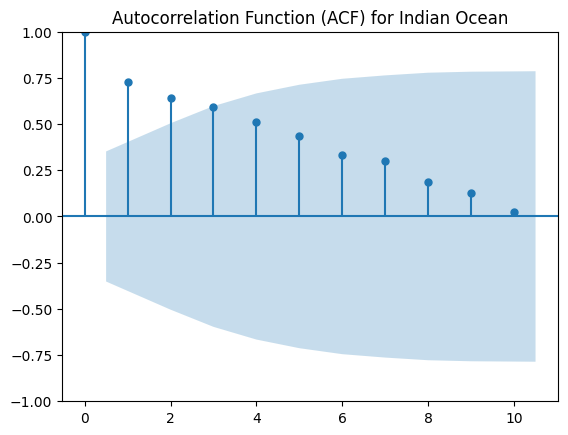

<Figure size 1000x500 with 0 Axes>

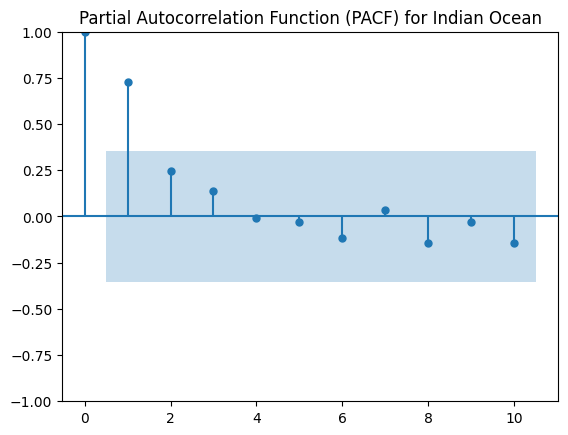

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

indian_ocean_data = yearly_changes.get('Indian Ocean', {})
values = list(indian_ocean_data.values())

# Remove NaN values
values = [x for x in values if not pd.isna(x)]

# Plot ACF
plt.figure(figsize=(10, 5))
plot_acf(values, lags=10, alpha=0.05)  # Adjust lags as needed
plt.title('Autocorrelation Function (ACF) for Indian Ocean')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(values, lags=10, alpha=0.05, method='ywm') # Adjust lags as needed
plt.title('Partial Autocorrelation Function (PACF) for Indian Ocean')
plt.show()


<Figure size 1000x500 with 0 Axes>

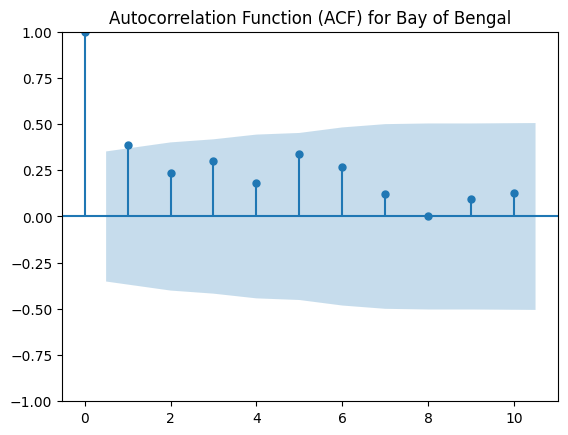

<Figure size 1000x500 with 0 Axes>

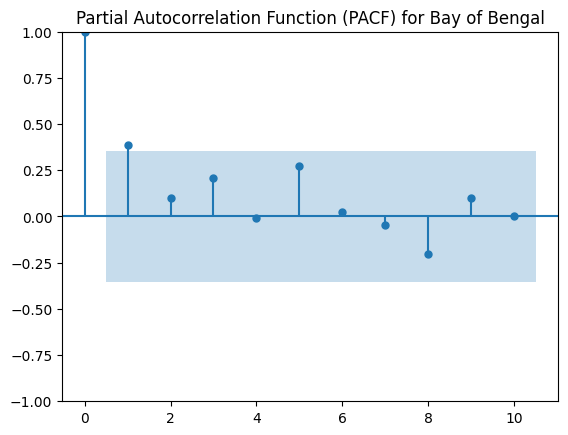

In [ ]:
bay_of_bengal_data = yearly_changes.get('Bay Bengal', {})
values = list(bay_of_bengal_data.values())

# Remove NaN values
values = [x for x in values if not pd.isna(x)]

# Plot ACF
plt.figure(figsize=(10, 5))
plot_acf(values, lags=10, alpha=0.05)  # Adjust lags as needed
plt.title('Autocorrelation Function (ACF) for Bay of Bengal')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(values, lags=10, alpha=0.05, method='ywm') # Adjust lags as needed
plt.title('Partial Autocorrelation Function (PACF) for Bay of Bengal')
plt.show()

<Figure size 1000x500 with 0 Axes>

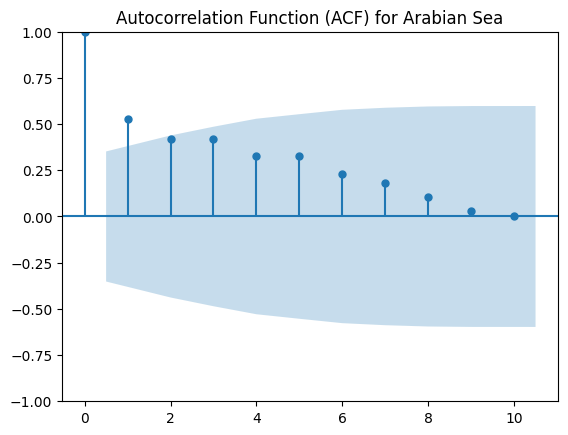

<Figure size 1000x500 with 0 Axes>

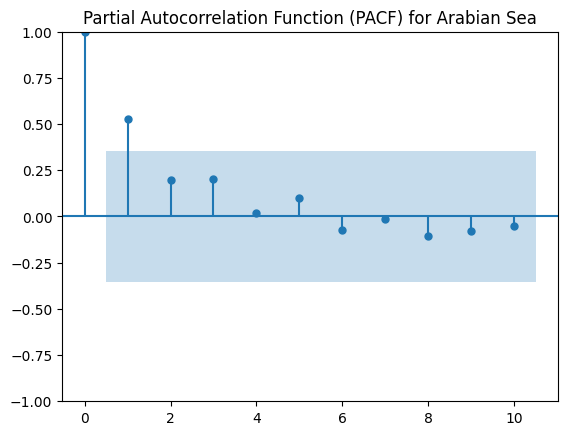

In [ ]:
arabian_sea_data = yearly_changes.get('Arabian Sea', {})
values = list(arabian_sea_data.values())

# Remove NaN values
values = [x for x in values if not pd.isna(x)]

# Plot ACF
plt.figure(figsize=(10, 5))
plot_acf(values, lags=10, alpha=0.05)  # Adjust lags as needed
plt.title('Autocorrelation Function (ACF) for Arabian Sea')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(values, lags=10, alpha=0.05, method='ywm') # Adjust lags as needed
plt.title('Partial Autocorrelation Function (PACF) for Arabian Sea')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(values)

# The p-value is in the result[1] position.
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Determine the optimal d value based on the p-value
# We don't need to look for p and q values from the plots here because we are calculating the p-value for the Augmented Dickey Fuller test.

if result[1] <= 0.05:
    print("The time series is likely stationary (d=0).")
    d = 0
else:
    print("The time series is likely non-stationary.")
    print("Difference the series once and repeat ADF test. You might need to difference it multiple times")
    # Difference the series once.
    values_diff = np.diff(values)

    # Perform ADF test on differenced data
    result_diff = adfuller(values_diff)
    print('ADF Statistic (Differenced): %f' % result_diff[0])
    print('p-value (Differenced): %f' % result_diff[1])

    if result_diff[1] <= 0.05:
        print("The differenced time series is likely stationary (d=1).")
        d = 1
    else:
        print("The differenced time series is likely non-stationary.")
        print("Try differencing again (d=2)")
        d = 2 # Or try further differencing until the series becomes stationary

print(f"The appropriate value for d is: {d}")


ADF Statistic: 0.250121
p-value: 0.974937
The time series is likely non-stationary.
Difference the series once and repeat ADF test. You might need to difference it multiple times
ADF Statistic (Differenced): -5.978864
p-value (Differenced): 0.000000
The differenced time series is likely stationary (d=1).
The appropriate value for d is: 1


In [ ]:
!pip install pmdarima
# Import the necessary library
from pmdarima import auto_arima

indian_ocean_data = yearly_changes.get('Indian Ocean', {})
values = list(indian_ocean_data.values())
values = [x for x in values if not pd.isna(x)]

# Use auto_arima to find the best (p, d, q) order
stepwise_model = auto_arima(values, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=False,
                           d=None, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(stepwise_model.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=261.361, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=253.678, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=260.446, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=247.449, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=249.310, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=249.224, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=252.884, Time=0.03 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 0.962 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   31
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -119.724
Date:

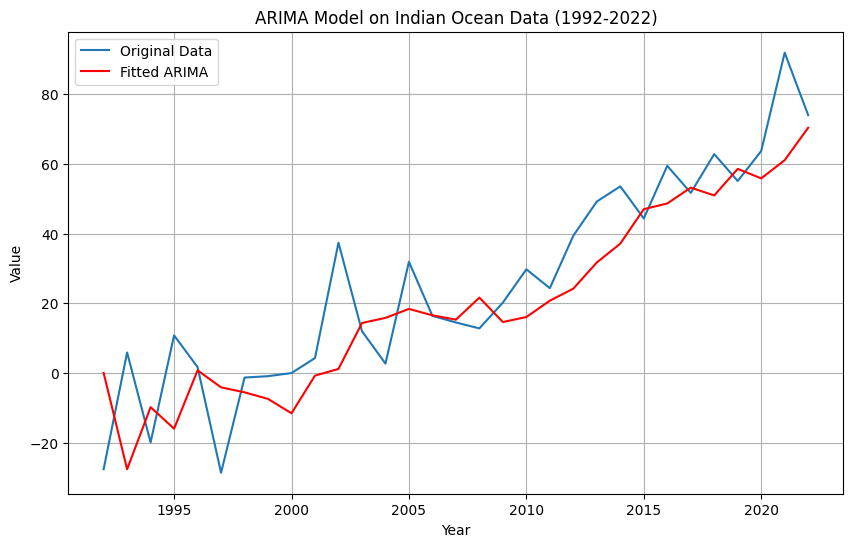

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming indian_ocean_data is defined from the previous code
indian_ocean_data = yearly_changes.get('Indian Ocean', {})
values = list(indian_ocean_data.values())
values = [x for x in values if not pd.isna(x)]
years = list(indian_ocean_data.keys())

# Fit the ARIMA model (example order (2, 1, 0))
model = ARIMA(values, order=(2, 1, 0))
model_fit = model.fit()

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(years, values, label='Original Data')

# Plot the fitted ARIMA model
plt.plot(years, model_fit.fittedvalues, label='Fitted ARIMA', color='red')


plt.xlabel('Year')
plt.ylabel('Value')
plt.title('ARIMA Model on Indian Ocean Data (1992-2022)')
plt.legend()
plt.grid(True)
plt.show()

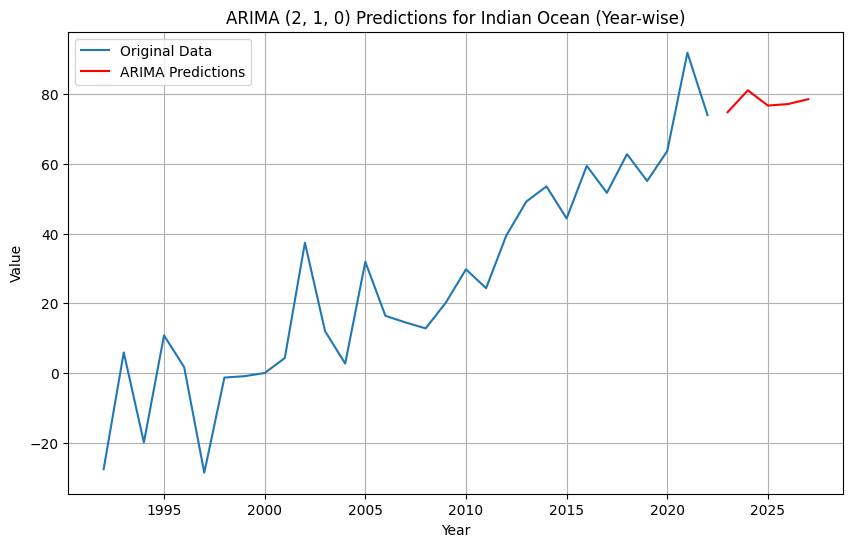

Year: 2023, Predicted Value: 74.80899936594646
Year: 2024, Predicted Value: 81.08379345353151
Year: 2025, Predicted Value: 76.70509012136324
Year: 2026, Predicted Value: 77.14779710312341
Year: 2027, Predicted Value: 78.52911964901244


In [ ]:

model = ARIMA(values, order=(2, 1, 0))
model_fit = model.fit()  # This line is crucial - it fits the model and assigns it to model_fit


predictions = model_fit.predict(start=len(values), end=len(values) + 4)

# Plotting the original data and predictions year-wise
plt.figure(figsize=(10, 6))
plt.plot(range(1992, 2023), values, label='Original Data')  # Plot original data with years
future_years = range(2023, 2028)
plt.plot(future_years, predictions, label='ARIMA Predictions', color='red')  # Plot predictions

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('ARIMA (2, 1, 0) Predictions for Indian Ocean (Year-wise)')
plt.legend()
plt.grid(True)
plt.show()
# Print the predictions year-wise (assuming the data starts from 1992)
for i, prediction in enumerate(predictions):
    year = 2023 + i  # Since predictions start from 2023
    print(f"Year: {year}, Predicted Value: {prediction}")

In [ ]:
bay_of_bengal_data = yearly_changes.get('Bay Bengal', {})
values = list(bay_of_bengal_data.values())
values = [x for x in values if not pd.isna(x)]

# Use auto_arima to find the best (p, d, q) order
stepwise_model = auto_arima(values, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(stepwise_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=206.176, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=204.178, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=206.081, Time=1.37 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=206.679, Time=4.49 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=214.676, Time=0.09 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=206.176, Time=0.86 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=208.176, Time=0.36 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=204.081, Time=0.18 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=206.081, Time=1.11 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=208.081, Time=0.28 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=205.828, Time=0.15 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=205.984, Time=0.15 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=204.681, Time=0.11 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=206.865, Time=0.21 sec
 ARIMA(1,0,0)(0,1,0)[12]         

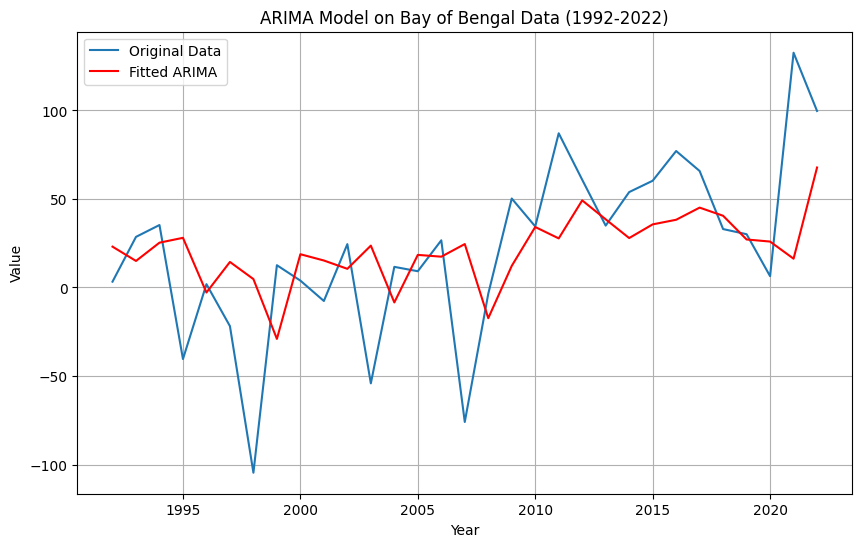

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming bay_of_bengal_data is defined as in your previous code
bay_of_bengal_data = yearly_changes.get('Bay Bengal', {})
values = list(bay_of_bengal_data.values())
values = [x for x in values if not pd.isna(x)]
years = list(bay_of_bengal_data.keys())
years = years[:len(values)]

# Fit the ARIMA model (example order (1, 0, 0))
model = ARIMA(values, order=(1, 0, 0))
model_fit = model.fit()

# Plot the original data and the fitted values
plt.figure(figsize=(10, 6))
plt.plot(years, values, label='Original Data')
plt.plot(years, model_fit.fittedvalues, label='Fitted ARIMA', color='red')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('ARIMA Model on Bay of Bengal Data (1992-2022)')
plt.legend()
plt.grid(True)
plt.show()

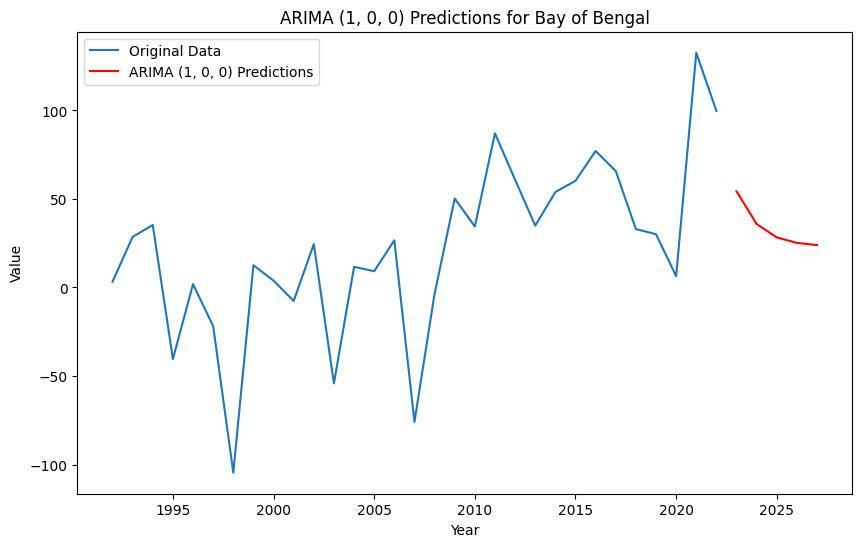

Predicted value for 2023: 54.3249113938531
Predicted value for 2024: 35.814727471378234
Predicted value for 2025: 28.2604062392197
Predicted value for 2026: 25.177359116746214
Predicted value for 2027: 23.919115090939002


In [ ]:
bay_of_bengal_data = yearly_changes.get('Bay Bengal', {})
values = list(bay_of_bengal_data.values())
values = [x for x in values if not pd.isna(x)]
years = list(bay_of_bengal_data.keys())
years = years[:len(values)]

# Fit the ARIMA(1, 0, 0) model
model = ARIMA(values, order=(1, 0, 0))  # (p, d, q) order
model_fit = model.fit()

# Make predictions for the next 5 years
predictions = model_fit.predict(start=len(values), end=len(values) + 4)

# Create a list of years for the predictions
future_years = list(range(years[-1] + 1, years[-1] + 6))


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, values, label='Original Data')
plt.plot(future_years, predictions, label='ARIMA (1, 0, 0) Predictions', color='red')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('ARIMA (1, 0, 0) Predictions for Bay of Bengal')
plt.legend()
plt.show()

# Print the predictions with corresponding years
for year, prediction in zip(future_years, predictions):
    print(f"Predicted value for {year}: {prediction}")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'arabian_sea_data' is defined as in your previous code
arabian_sea_data = yearly_changes.get('Arabian Sea', {})
values = list(arabian_sea_data.values())
values = [x for x in values if not pd.isna(x)]

# Use auto_arima to find the best (p, d, q) order
stepwise_model = auto_arima(values, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=False,
                           d=None, D=1, trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(stepwise_model.summary())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   31
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -138.910
Date:                Sat, 14 Dec 2024   AIC                            283.821
Time:                        03:36:29   BIC                            288.024
Sample:                             0   HQIC                           285.166
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9022      1.479      1.962      0.050       0.003       5.801
ma.L1         -0.7161      0.181     -3.951      0.000      -1.071      -0.361
sigma2       601.1656    165.203      3.639      0.0

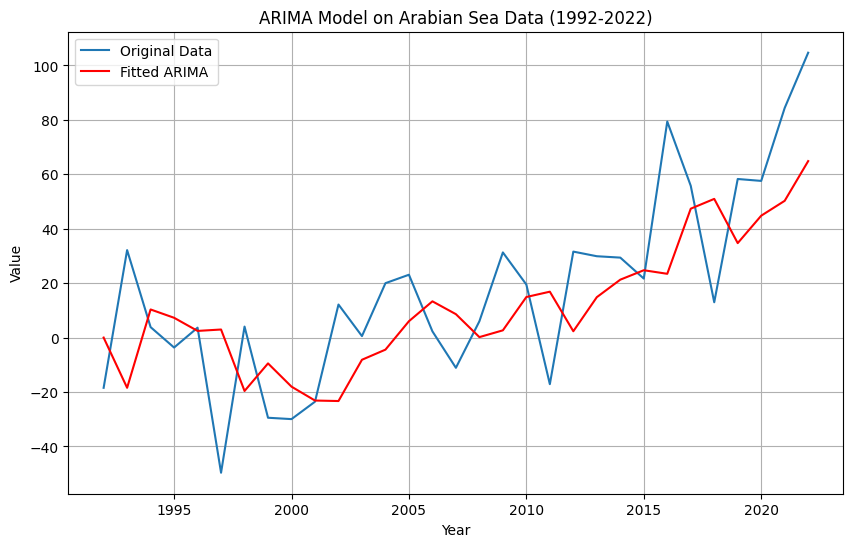

In [ ]:
arabian_sea_data = yearly_changes.get('Arabian Sea', {})
values = list(arabian_sea_data.values())
values = [x for x in values if not pd.isna(x)]
years = list(arabian_sea_data.keys())
years = years[:len(values)]

# Fit the ARIMA model (example order (0, 1, 1))
model = ARIMA(values, order=(0, 1, 1))
model_fit = model.fit()

# Plot the original data and the fitted values
plt.figure(figsize=(10, 6))
plt.plot(years, values, label='Original Data')
plt.plot(years, model_fit.fittedvalues, label='Fitted ARIMA', color='red')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('ARIMA Model on Arabian Sea Data (1992-2022)')
plt.legend()
plt.grid(True)
plt.show()

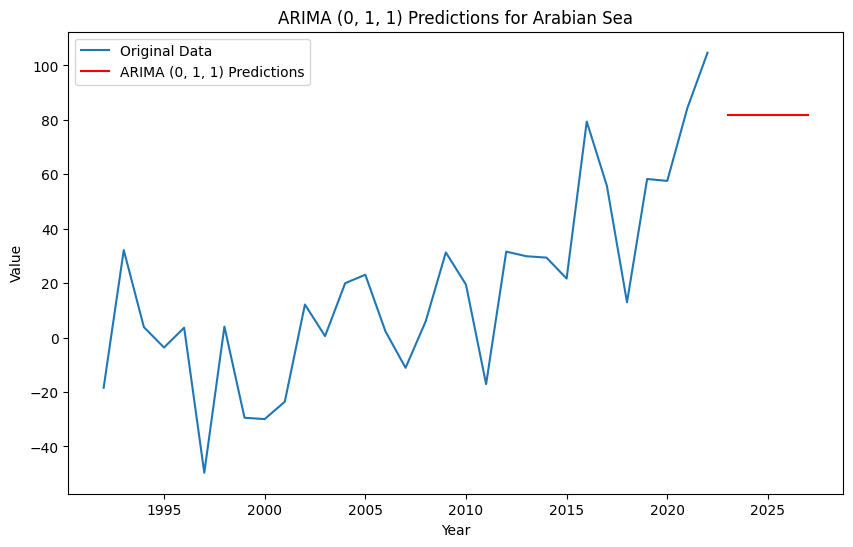

Predictions for Arabian Sea:
Predicted value for 2023: 81.87949659111074
Predicted value for 2024: 81.87949659111074
Predicted value for 2025: 81.87949659111074
Predicted value for 2026: 81.87949659111074
Predicted value for 2027: 81.87949659111074


In [ ]:
arabian_sea_data = yearly_changes.get('Arabian Sea', {})
values = list(arabian_sea_data.values())
values = [x for x in values if not pd.isna(x)]
years = list(arabian_sea_data.keys())
years = years[:len(values)]

# Fit the ARIMA(0, 1, 1) model
model = ARIMA(values, order=(0, 1, 1))
model_fit = model.fit()

# Make predictions for the next 5 years
predictions = model_fit.predict(start=len(values), end=len(values) + 4)

# Create a list of years for the predictions
future_years = list(range(years[-1] + 1, years[-1] + 6))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, values, label='Original Data')
plt.plot(future_years, predictions, label='ARIMA (0, 1, 1) Predictions', color='red')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('ARIMA (0, 1, 1) Predictions for Arabian Sea')
plt.legend()
plt.show()

# Print the predictions with corresponding years
print("Predictions for Arabian Sea:")
for year, prediction in zip(future_years, predictions):
    print(f"Predicted value for {year}: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Indian Ocean data : [77.41930939435959, 84.43952280461788, 89.09332427620888, 97.9837309718132, 106.89898720502853]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Bay of Bengal data : [29.27138907402754, 27.855543135404588, 28.789355684518817, 29.95107430577278, 32.80738573372364]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Arabian Sea data : [56.68493296921253, 57.89206852853299, 71.02676858186722, 75.90009803116322, 82.5060283613205]


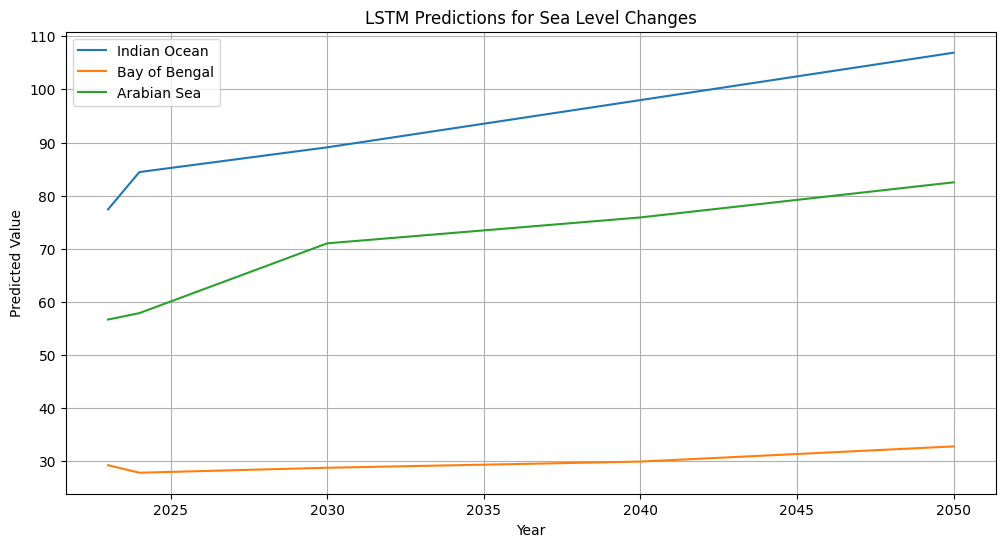

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np


def prepare_data(data):
    values = list(data.values())
    values = [x for x in values if not np.isnan(x)]  # Remove NaN values
    # Normalize the data (important for LSTM)
    values = np.array(values) / np.max(values)

    # Create sequences for LSTM input
    sequence_length = 5  # Adjust as needed
    X, y = [], []
    for i in range(len(values) - sequence_length):
        X.append(values[i:i + sequence_length])
        y.append(values[i + sequence_length])
    X = np.array(X)
    y = np.array(y)
    return X, y

# Prepare data for each region
X_indian, y_indian = prepare_data(indian_ocean_data)
X_bay, y_bay = prepare_data(bay_of_bengal_data)
X_arabian, y_arabian = prepare_data(arabian_sea_data)


# Example LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_indian.shape[1], 1)))  # Input shape adjusted
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Train the model for each region (example)
model_indian = create_lstm_model()
model_indian.fit(X_indian, y_indian, epochs=50, verbose=0)  # Adjust epochs as needed

model_bay = create_lstm_model()
model_bay.fit(X_bay, y_bay, epochs=50, verbose=0)

model_arabian = create_lstm_model()
model_arabian.fit(X_arabian, y_arabian, epochs=50, verbose=0)


# Function to predict values
def predict_future_values(model, X, years):
  predictions = []
  last_sequence = X[-1]
  for _ in range(len(years)):
      prediction = model.predict(np.array([last_sequence]))[0, 0]
      predictions.append(prediction * np.max(list(indian_ocean_data.values())))  # Denormalize
      last_sequence = np.append(last_sequence[1:], prediction)  # Update the sequence
  return predictions


# Predict values for future years
future_years = [2023,2024,2030,2040,2050]
predicted_indian = predict_future_values(model_indian, X_indian, future_years)
print('Indian Ocean data :',predicted_indian)
predicted_bay = predict_future_values(model_bay, X_bay, future_years)
print('Bay of Bengal data :',predicted_bay)
predicted_arabian = predict_future_values(model_arabian, X_arabian, future_years)
print('Arabian Sea data :',predicted_arabian)
# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(future_years, predicted_indian, label='Indian Ocean')
plt.plot(future_years, predicted_bay, label='Bay of Bengal')
plt.plot(future_years, predicted_arabian, label='Arabian Sea')

plt.xlabel('Year')
plt.ylabel('Predicted Value')
plt.title('LSTM Predictions for Sea Level Changes')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

print("LSTM Model Summary for Indian Ocean:")
model_indian.summary()

print("\nLSTM Model Summary for Bay of Bengal:")
model_bay.summary()

print("\nLSTM Model Summary for Arabian Sea:")
model_arabian.summary()

LSTM Model Summary for Indian Ocean:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)


LSTM Model Summary for Bay of Bengal:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)


LSTM Model Summary for Arabian Sea:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)